In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from itertools import combinations
from tqdm.notebook import tqdm


def getXY(csv, features=None, do_print=True):
    df = csv.copy()
    y_ori = np.array(df['type'])
    y_ori[y_ori == 0] = 0
    y_ori[y_ori == 2] = 1
    y_ori
    if(type(features) == type(None)):
        head = list(df.keys())
        head.remove('Unnamed: 0')
        head.remove('name')
        head.remove('score')
        head.remove('type')
        X_ori = np.array(df[head])
    else:
        X_ori = np.array(df[features])
    if(do_print):
        print(f"{X_ori.shape=} {y_ori.shape=}")
    return X_ori, y_ori

def train_model(X_ori,y_ori, do_print=True):
    X,y = X_ori.copy(), y_ori.copy()

    from sklearn.svm import SVC
    from sklearn.utils import shuffle
    from sklearn.model_selection import cross_val_score

    X_shuff,y_shuff = shuffle(X,y)
    model = SVC(kernel='rbf')
    cross = cross_val_score(model, X_shuff, y_shuff, cv=10)

    model = SVC(kernel='rbf')
    model.fit(X_shuff, y_shuff)
    ans = model.predict(X_shuff)
    acc = sum(ans == y_shuff) / len(y_shuff)
    if(do_print):
        print(acc, cross.mean(), cross)
        return model
    else:
        return model, acc, cross

from multiprocessing import Pool
def cal(p_id,head, comb_list):
    accs = []
    cvs = []
    combs = []
    for index, comb in enumerate(comb_list):
        if(index % 400 == 0): print(f"\t{p_id} {index}/{len(comb_list)}")
        X,y = getXY(csv.copy(),features=head[list(comb)] , do_print=False)
        model_all, acc, cross = train_model(X,y, do_print=False)
        accs.append(acc)
        cvs.append(cross.mean())
        combs.append(comb)
    return combs,accs,cvs  

In [3]:
csv = pd.read_csv('export/15s_133features_filter_std_pca133.csv')
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
head = np.array(head)

accs = []
cvs = []
combs = []
comb_list = list(combinations( range(133) ,2 ))
try:
    t_out = 60000
    pool = Pool()
    p_list = []
    num_p = 6
    for p_id in range(num_p):
        p_list.append(pool.apply_async( cal, [p_id,head, comb_list[p_id::num_p]] ))
    for i in range(num_p):
        ans = p_list[i].get(timeout=t_out)
        combs = combs + ans[0]
        accs = accs + ans[1]
        cvs = cvs + ans[2]
    # ans_list
finally:
    print("========= close ========")
    pool.close() 
    pool.terminate()

	4 0/1463	1 0/1463	0 0/1463	5 0/1463	2 0/1463	3 0/1463





	0 400/1463
	5 400/1463
	1 400/1463
	4 400/1463
	3 400/1463
	2 400/1463
	0 800/1463
	3 800/1463
	5 800/1463
	4 800/1463
	2 800/1463
	1 800/1463
	0 1200/1463
	3 1200/1463
	5 1200/1463
	4 1200/1463
	2 1200/1463
	1 1200/1463
========= close ========


In [5]:
for index in range(len(combs)):
    if(accs[index] > 0.8):
        print(combs[index], accs[index], cvs[index])

(0, 7) 0.8277777777777777 0.8222222222222223
(4, 7) 0.8236111111111111 0.8027777777777778
(5, 7) 0.8125 0.7875
(7, 9) 0.8069444444444445 0.8041666666666666
(7, 15) 0.8013888888888889 0.7791666666666667


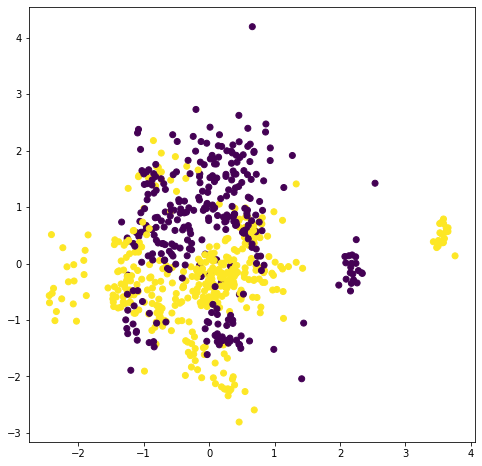

In [12]:
X,y = getXY(csv.copy(), do_print=False)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,7], c=y )
plt.show()

In [18]:
csv = pd.read_csv('export/15s_133features_filter_std_pca133.csv')
head = list(csv.columns)
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')
head = np.array(head)

accs = []
cvs = []
combs = []
for i in range(133):
    if(i == 0 or i == 7): continue
    X,y = getXY(csv.copy(),features=head[[0,7,i]] , do_print=False)
    model_all, acc, cross = train_model(X,y, do_print=False)
    if(acc > 0.87):
        print(i,acc,cross.mean())

6 0.8819444444444444 0.8680555555555557
13 0.8791666666666667 0.8625


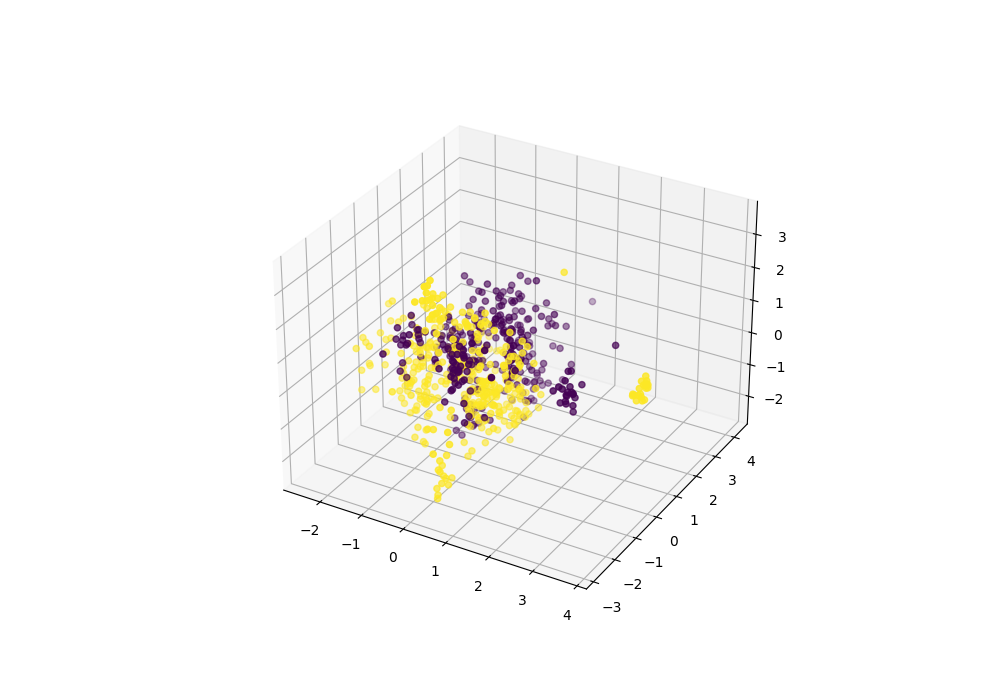

In [19]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
X,y = getXY(csv.copy() , do_print=False)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0],X[:,7],X[:,13], c=y)